The NumPy functions don't calculate probability. Instead they draw samples from the probability distribution of the statistic—resulting in a curve. The curve can be steep and narrow or wide or reach a small value quickly over time

Cumulative distribution function(cdf)-which gives the probability that a random variable is less than or equal to a certain value.Its not hard to create the cdf for the uniform distribution.


In [2]:
import random
def uniform_cdf(x):
    """returns the probability that a uniform random variable is<=x """
    if x<0:
        return 0
    elif x<1:
        return x
    else:
        return 1 
uniform_cdf(random.randint(-10,10))

0

Normal distribution
Completely determined by 2 parameters;mean(mu)and standard deviation(sigma)

In [3]:
#normal distribution
import math
def normal_pdf(x,mu=0,sigma=1):
    sqrt_two_pi=math.sqrt(2 * math.pi)
    return(math.exp(-(x-mu)**2 / (2*sigma**2))/(sqrt_two_pi*sigma))

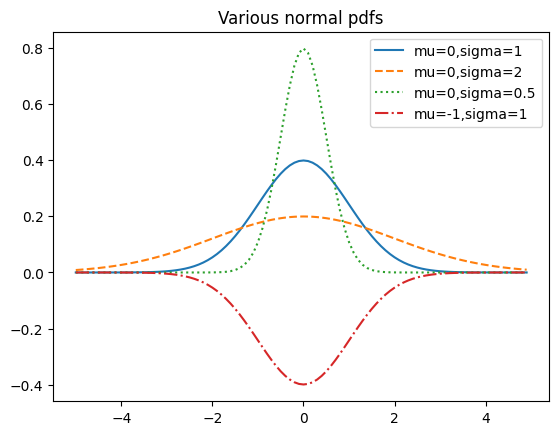

In [4]:
#We plot some of these pdfs to see what they look like
import matplotlib.pyplot as plt
xs=[x/10.0 for x in range(-50,50)]
plt.plot(xs,[normal_pdf(x,sigma=1)for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2)for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5)for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,sigma=-1)for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.title("Various normal pdfs")
plt.show()

The cumulative distribution functionfor the normal distribution cannot be writteh in an elementary manner,but we can write using python's math.erf

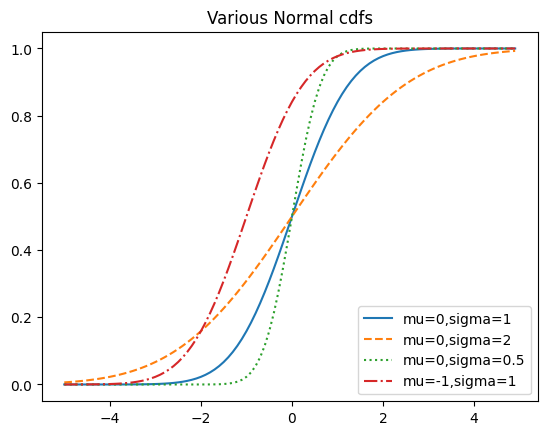

In [5]:
def normal_cdf(x, mu=0,sigma=1):
     return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend(loc=4) # bottom right
plt.title("Various Normal cdfs")
plt.show()

In [9]:
def inverse_normal_cdf(p,mu=0,sigma=1,tolerance=0.00001): 
   """find approximate inverse using binary search  """
   #if not standard,compute and rescale
   if mu !=0 or sigma !=1:
        return mu + sigma * inverse_normal_cdf(p,tolerance=tolerance)
   low_z, low_p=-10,0  #normal_cdf(-10) is (very close to) 0
   hi_z,hi_p=10,1      #normal_cdf(10) is (very close to) 1
   while hi_z - low_z > tolerance:
        mid_z= (low_z + hi_z) /2  #consider the midpoint
        mid_P =normal_cdf(mid_z)  # and the cdfs value there

        if mid_P<p:
            #midpoint is still too low,search above it
            low_z,low_p=mid_z,mid_P
        elif mid_P > p:
            #midpoint is still too high,search below it
            hi_z,hi_p=mid_z,mid_P
        else:
            break
   return mid_z


inverse_normal_cdf(p=10)





9.999990463256836